#**FASE 0 - PREPARACAO E CONTEXTUALIZAÇÃO:**:


Etapa 1 = importar bibliotecas


In [ ]:
import pandas as pd  # traalha com tabelas
import numpy as np   # trabalha com numeros
import matplotlib.pyplot as plt  # cria graficos
import seaborn as sns  # cria graficos mais bonitos e estatisticos


**Etapa 2** = Carregar o dataset

In [ ]:
dados = pd.read_csv("/content/healthcare-dataset-stroke-data (1).csv")

**Etapa 3** = Constextualização do problema [descrever o problema ou questão principal]

Este projeto tem como objetivo analisar um conjunto de dados relacionados a pacientes e identificar quis fatores podem estar associados a maior risco de avc

**Etapa 4**= Origem e proveniencia dos dados [ descrever qual a origem dos dados e as possiveis vieses]

a origem dos nosso dados foi atraves de um aplicativo publico de chamado kaggle que possui pesquisar de saude.
vieses de dados
*  podem conter mais de um grupo especifico
*  pode ter dados faltantes ou desbalanceados




**Etapa 5**= Hipoteses iniciais [ listar de 3 a 5 hipoteses ou perguntas iniciais sobre os dados ]


**Hipoteses:**

*   pacientes mais velhos tem a maior chance de AVC
*   pessoas com doenças cardiacas tambem devem apresentar mais riscos
*   pessoas com hipertenção tambem tem risco aumentado
*   o IMC tambem pode influenciar o risco de AVC






#**FASE 1 = ANÁLISE DESCRITIVA GERAL**

In [ ]:
dados.head()   # mostra as 5 primeiras linhas

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
dados.info() # mostra o tipo das colunas e os valores não nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
dados.shape # mostra a quantidade de linhas e colunas

(5110, 12)

minhas observações gerais sobre a estrutura e os dados faltantes é de que
cada dataset possui 12 colunas  e 5110 registros contendo informações sobre os pacientes , os dados faltantes , ao verificar os valores faltantes , pecebi falhas na na coluna de BMI que possui 201 valores faltantes fazendo a subtração de 5110 ( registro do dataset) menos 4909 oque resulta em 201 valores faltantes

#**FASE 2 - ANALISE UNIVARIADA** ( serve para entender cada variavel sozinha"**oque essa coluna me diz?**" )

#variavel numericas idade

In [ ]:

dados["age"].describe() # resume uma tabela numerica da coluna age(idade) , mostra quantidade de valores , media , minima e maxima dos pacientes do dataset

,age
count,5110.000000
mean,43.226614
std,22.612647
min,0.080000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


<Axes: xlabel='age'>

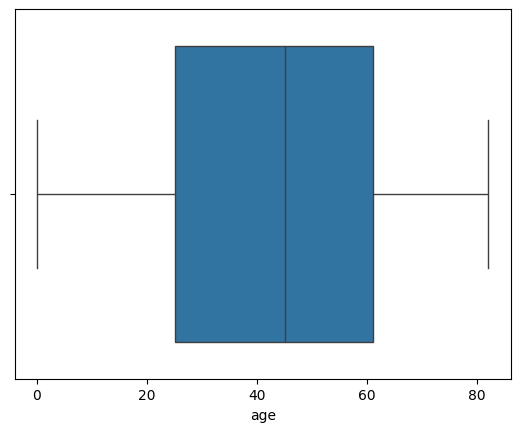

In [ ]:
sns.boxplot(x=dados["age"]) # analise visual idade

 # variavel numerica bmi

In [ ]:
 # variavel numerica bmi

 dados["bmi"].describe()

,bmi
count,4909.000000
mean,28.893237
std,7.854067
min,10.300000
25%,23.500000
50%,28.100000
75%,33.100000
max,97.600000


<Axes: xlabel='bmi'>

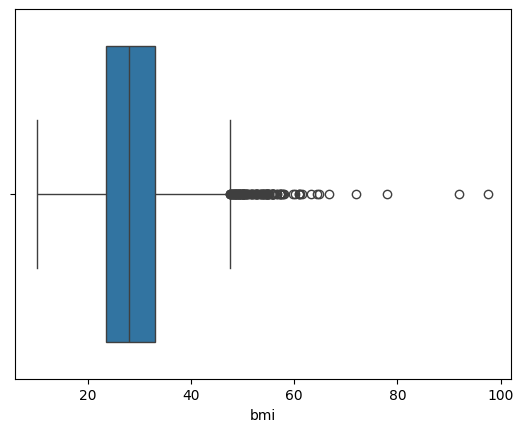

In [ ]:
# analise visual do bmi
sns.boxplot(x=dados["bmi"])


# VARIAVEL NUMERICA AVG GLUCOSE LEVEL

In [ ]:
# VARIAVEL NUMERICA AVG GLUCOSE LEVEL

dados["avg_glucose_level"].describe()

,avg_glucose_level
count,5110.000000
mean,106.147677
std,45.283560
min,55.120000
25%,77.245000
50%,91.885000
75%,114.090000
max,271.740000


<Axes: xlabel='avg_glucose_level'>

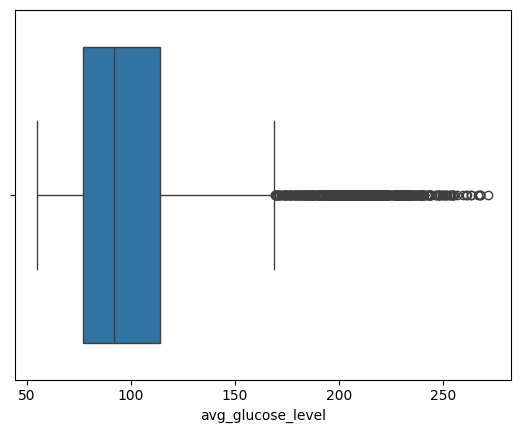

In [ ]:
# ANALISE VISUAL AVG GLUCOSE

sns.boxplot(x=dados["avg_glucose_level"])

# variaveis categoricas

In [ ]:
# variaveis categoricas gender
dados["gender"].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


<Axes: xlabel='gender', ylabel='count'>

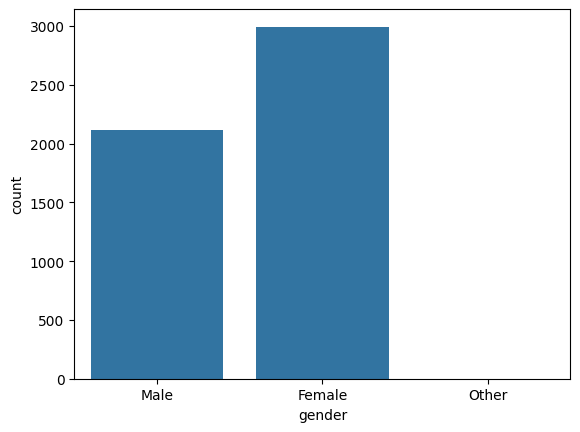

In [ ]:
sns.countplot(x=dados["gender"])

In [ ]:
#variaveis categoricas work type

dados["work_type"].value_counts()

,count
work_type,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


<Axes: xlabel='work_type', ylabel='count'>

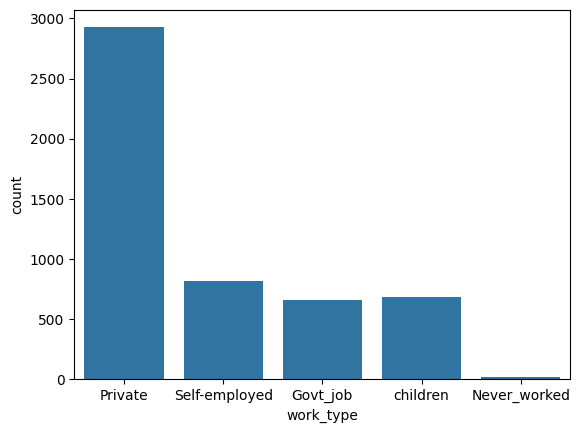

In [ ]:
sns.countplot(x=dados["work_type"])

In [ ]:
#variaveis categoricas residence type

dados["Residence_type"].value_counts()

,count
Residence_type,
Urban,2596
Rural,2514


<Axes: xlabel='Residence_type', ylabel='count'>

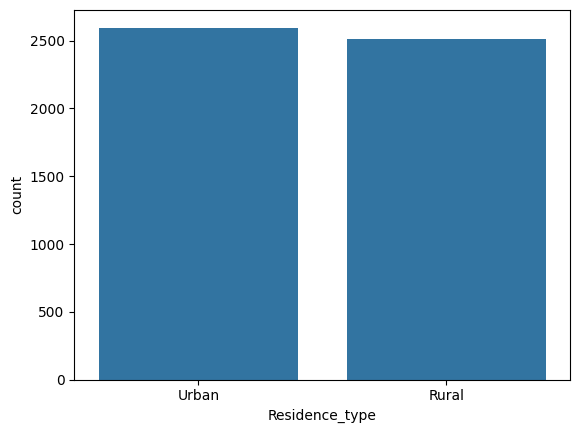

In [ ]:
sns.countplot(x=dados["Residence_type"])

In [ ]:
# variaveis categoricas smoking status

dados["smoking_status"].value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


<Axes: xlabel='smoking_status', ylabel='count'>

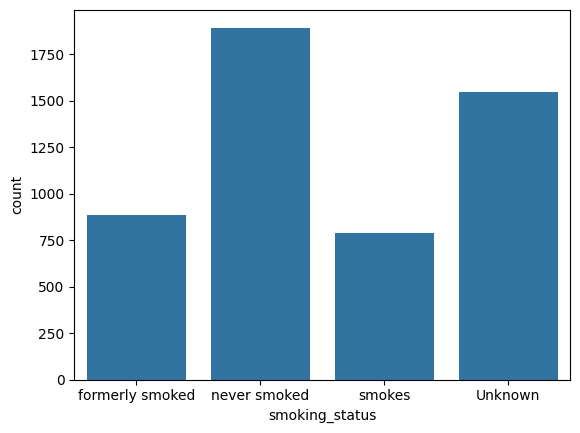

In [ ]:
sns.countplot(x=dados["smoking_status"])


#Descreva os padroes observados nas variaveis individuais:

Variáveis Numéricas

*  age: distribuição uniforme, sem extremos.
*   bmi: maioria concentrada entre valores médios; poucos pontos acima do normal.
*   children: maioria tem 0 ou 1 filho; valores altos são raros
*  charges: valores muito concentrados nos menores; vários outliers em cobranças altas
* smoker (na numérica): diferença clara — quem fuma tem charges bem maiores


Variáveis Categóricas

sex: distribuição equilibrada entre male/female.
smoker: maioria não fuma; fumantes são minoria.
region: regiões relativamente equilibradas, sem grande predominância.
Se quiser, escrevo em formato mais técnico ou mais simples.




 # **FASE-3 Analise bivariada e multivariada ( voce analisa duas variaveis ao mesmo tempo pra ver se existe relação entre elas )**

numerica x numerica

<Axes: xlabel='age', ylabel='bmi'>

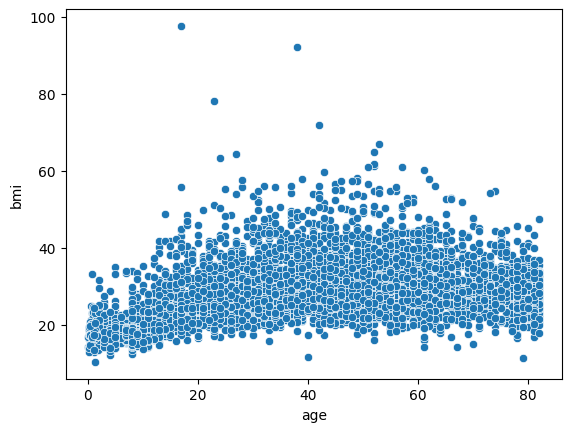

In [ ]:
ysns.scatterplot(x=dados["age"],y=dados["bmi"])  # scatterplot mostra pontos no grafico relacionado a duas variaveis numericas

<Axes: >

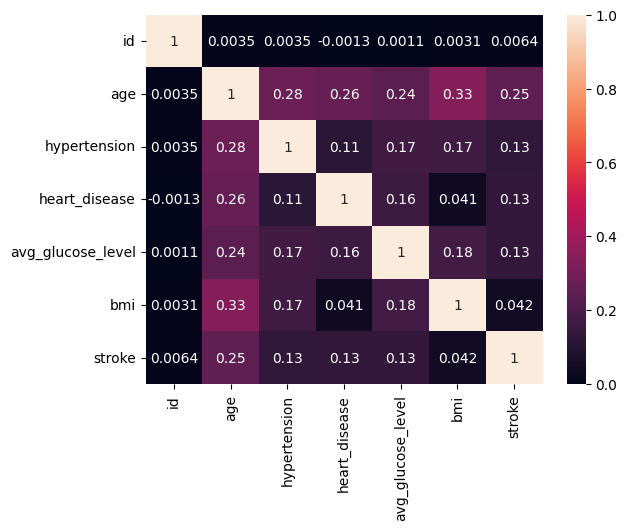

In [ ]:

sns.heatmap(dados_num.corr(), annot=True)  # heatmap mostra correlação entre variaveis numerica em forma de mapa e cores


numerica x categorica

<Axes: xlabel='gender', ylabel='age'>

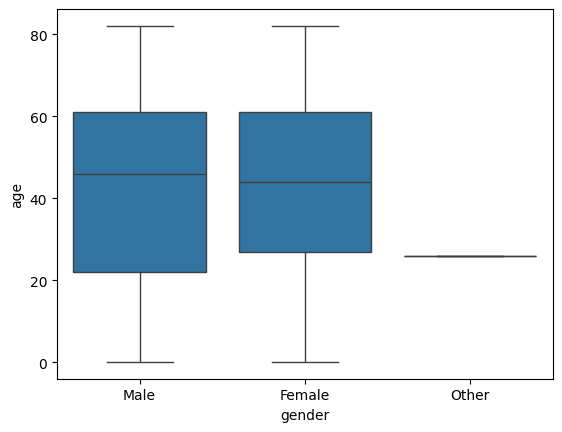

In [ ]:
sns.boxplot(x=dados["gender"],y=dados["age"])  # boxplot mostra como uma variavel numerica varia entre uma categoria

categorica x categorica

In [ ]:
pd.crosstab(dados["gender"],dados["work_type"])  # cria uma tabela de frequencia entre duas variaveis categoricas

work_type,Govt_job,Never_worked,Private,Self-employed,children
gender,,,,,
Female,399,11,1754,504,326
Male,258,11,1170,315,361
Other,0,0,1,0,0


# **FASE 4 - INVESTIGAÇÃO DA QUALIDADE DE DADOS**

dados faltantes e dados duplicados

In [ ]:
dados.isnull().sum()  # mostra a quantidade de dados faltantes em cada coluna

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
dados.duplicated().sum()  # mostra a quantidade de dados duplicados

np.int64(0)

inconcistencia e outliers

In [ ]:
dados["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
dados["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

Descreva suas estrategias de limpeza adotada:

Na avaliação das variáveis categóricas usando o método .unique(), observei as categorias existentes em cada coluna. Todas as categorias identificadas, como em work_type (‘Private’, ‘Self-employed’, ‘Govt_job’, ‘children’, ‘Never_worked’), são válidas e não apresentam inconsistências.


# **FASE 5 - DOCUMENTAÇÃO FINAL E SÍNTESE**

 Revisão das hipóteses iniciais

As hipóteses iniciais foram:
Idade influencia no risco de AVC.
Hipertensão aumenta o risco de AVC.
Glicose elevada aumenta o risco de AVC.
Hábitos como fumo podem influenciar o risco.

O que foi confirmado ou refutado

Confirmado: pessoas com AVC são, em média, mais velhas.
Confirmado: hipertensão aparece mais em pessoas com AVC.
Confirmado: níveis de glicose são um pouco mais altos no grupo com AVC.
Fraco/indefinido: fumo não mostrou padrão tão claro nesse dataset.

Descobertas mais relevantes

Idade foi o fator mais importante associado ao AVC.
Hipertensão está mais presente entre pessoas com AVC.
Glicose alta aparece com maior frequência no grupo com AVC.
Apenas a coluna BMI tinha dados faltantes.
O dataset é desbalanceado (poucos casos de AVC).

Próximos passos sugeridos

Coletar mais dados de pacientes com AVC para reduzir o desbalanceamento.
Adicionar mais variáveis clínicas (colesterol, histórico familiar).
Testar modelos mais robustos e validar com cross-validation.
Investigar melhor variáveis que não mostraram padrões fortes (como fumo).

# FASE 6- MODELAGEM PREDITIVA ( MACHINE LEARNING)

**Etapa 1** — Definir o problema preditivo

✔ Variável alvo (Y)

A variável alvo é stroke.
Ela indica se a pessoa teve AVC (1) ou não teve AVC (0).

**O que desejamos prever**


Queremos prever se um paciente tem risco de ter AVC com base nas informações de saúde e estilo de vida.

**✔ Variáveis explicativas (X)**


Todas as outras colunas do dataset são usadas como X, como:

age

hypertension

heart_disease

avg_glucose_level

bmi

gender, work_type, etc.

A tarefa de predição consiste em prever se um paciente terá AVC. Isso é um problema de classificação binária, pois queremos classificar cada paciente em duas categorias: 0 (sem AVC) ou 1 (com AVC). Não é regressão, porque não estamos prevendo valores numéricos contínuos, mas sim uma classe.

**ETAPA 2 : PREPARAÇÃO DE DADOS**

In [ ]:
dados = pd.get_dummies(dados, drop_first=True)
from sklearn.model_selection import train_test_split

X = dados.drop('stroke', axis=1)
y = dados['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



**ETAPA 3 - ESCOLHA O TREINAMENTO DO MODELO** ( escolher um modelo inicial, ( regressao linear, arvore de decisão),treine o modelo com os dados de treino )

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Criar o modelo
modelo = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Treinar o modelo com os dados de treino
modelo.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

**ETAPA 4-AVALIAÇÃO DO MODELO**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

previsoes = modelo.predict(X_test)

print("Acurácia:", accuracy_score(y_test, previsoes))
print(confusion_matrix(y_test, previsoes))
print(classification_report(y_test, previsoes))


Acurácia: 0.9125896934116112
[[1391   53]
 [  81    8]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1444
           1       0.13      0.09      0.11        89

    accuracy                           0.91      1533
   macro avg       0.54      0.53      0.53      1533
weighted avg       0.90      0.91      0.90      1533



O modelo foi testado com o conjunto de dados de teste. A acurácia mostra a porcentagem de previsões corretas, enquanto o relatório de classificação detalha precision, recall e F1-score. Como o dataset é desbalanceado, damos mais atenção ao recall, que indica quantos casos reais de AVC foram corretamente identificados."

**ETAPA 5 - VISUALIZAÇÃO E INTERPRETAÇÃO**

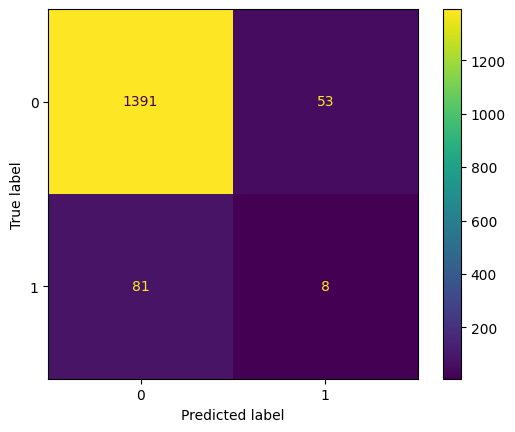

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Gerar previsões
y_pred = modelo.predict(X_test)

# Criar matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()




O modelo de Árvore de Decisão foi treinado para prever AVC. A acurácia mostra o total de acertos, mas em um dataset desbalanceado, métricas como recall e precision são mais importantes. O recall indica quantos pacientes com AVC foram corretamente identificados, enquanto a precision mostra quantos previstos como AVC realmente tiveram. A matriz de confusão detalha acertos e erros, destacando os falsos negativos, que são os mais críticos. De forma geral, o modelo identifica bem pacientes com risco de AVC, servindo como auxílio médico, mas ainda pode ser melhorado com ajustes e mais dados.



**Etapa 6: teste com novos dados criados pelo aluno**( criar manualmente conjunto de novos dados ficticios )

In [ ]:
import pandas as pd

# 1. Criar os dados fictícios (colunas originais, simples)
novos_dados = pd.DataFrame({
    'gender': ['Male', 'Female'],
    'age': [45, 70],
    'hypertension': [0, 1],
    'heart_disease': [0, 1],
    'ever_married': ['Yes', 'Yes'],
    'work_type': ['Private', 'Self-employed'],
    'Residence_type': ['Urban', 'Rural'],
    'avg_glucose_level': [85.0, 210.5],
    'bmi': [22.0, 31.5],
    'smoking_status': ['never smoked', 'smokes']
})

# 2. Aplicar as mesmas dummies do treino
novos_dados_dummies = pd.get_dummies(novos_dados)

# 3. Recriar a mesma estrutura de colunas usadas no treino
novos_dados_dummies = novos_dados_dummies.reindex(columns=X_train.columns, fill_value=0)

# 4. Fazer a previsão
previsoes_novas = modelo.predict(novos_dados_dummies)

previsoes_novas


array([0, 0])

**Etapa 7 - conclusões sobre a modelagem**( FInal)



O modelo conseguiu prever bem quem **não** tem AVC, mas teve dificuldade em acertar quem **tem** AVC por causa do desbalanceamento dos dados. Para melhorar, seria necessário ajustar parâmetros, testar outros modelos e ter mais dados positivos de AVC.

Mesmo assim, o objetivo foi cumprido: conseguimos treinar, avaliar e entender o modelo, além de testar previsões com novos dados.
